In [31]:
%reset
import py2neo

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [32]:
#note, server must be running on localhost 
#sudo service neo4j start
graph = py2neo.Graph('bolt://localhost:7687', auth=('neo4j','ItIsABadIdeaToHardCodePasswords'))

### Task B

Count the number of nodes

In [34]:
Query = 'MATCH (n:Article) RETURN count(*)'
out = graph.run(Query)
for i in out:
    print(i)

('count(*)': 6661235)


Articles all start with journals in their key, so to count the articles and not thesis, books, etc:

In [10]:
Query = ('MATCH (n:Article) WHERE n.key STARTS WITH \'journals\' '+
         'RETURN  count(*)')
out = graph.run(Query)
for i in out:
    print(i)

('count(*)': 1956852)


NOTE: from now on considering articles as all possible entries in the Article Node

In [25]:
Query = ('MATCH (a:Author)-[p:PUBLISHED]-(:Article)'+
         ' RETURN a.name, count(p) as rel_count'+
         ' ORDER BY rel_count desc LIMIT 10')
out = graph.run(Query)
print(list(out)[0])

('a.name': 'H. Vincent Poor', 'rel_count': 1568)


### Task C

In [94]:
import pandas as pd
author = []
title = []
Query = ('MATCH (a:Author)-[p:PUBLISHED]->(b:Article)'+
         ' WHERE a.name in [\'Kevin Vella\', \'Keith Bugeja\', \'Christian Colombo\', \'Joshua Ellul\','+
         ' \'Adrian Francalanza\',\'Mark Micallef\', \'Gordon J. Pace\', \'Sandro Spina\', \'Mark Vella\','+
         ' \'Kevin Cortis\']'+
         ' RETURN a,p,b')
out = graph.run(Query)
for i in out:
    author.append(i['a']['name'])
    title.append(i['b']['title'])
df = pd.DataFrame({'author':author,'title':title})
df.head()

,author,title
0,Gordon J. Pace,Home Page
1,Gordon J. Pace,A Controlled Natural Language for Business Int...
2,Gordon J. Pace,A Controlled Language for the Specification of...
3,Gordon J. Pace,Controlled Natural Language in a Game for Lega...
4,Gordon J. Pace,A Controlled Language for the Specification of...


In [51]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

Create the graph using networkx

In [95]:
G = nx.from_pandas_edgelist(df,'author','title')

Change the color of the author nodes

In [96]:
cs_list = pd.unique(df['author'])
color_map = []
node_sizes = []
labels = {}

for node in G:
    if node in cs_list:
        #print(node)
        color_map.append('blue')
        labels[node]=node
        node_sizes.append(900)
    else:
        color_map.append('red')
        node_sizes.append(100)

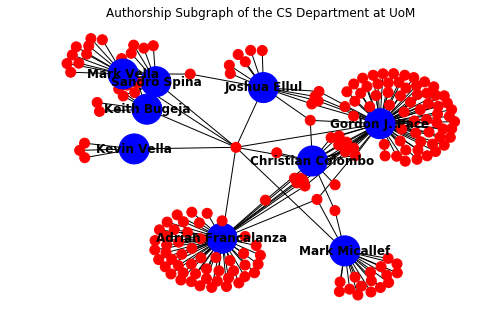

In [98]:
fig = plt.figure()
pos = nx.networkx.spring_layout(G)
nx.draw(G,pos,node_size = node_sizes,node_color = color_map, with_labels = False)
nx.draw_networkx_labels(G,pos,labels,font_weight='bold')
plt.title('Authorship Subgraph of the CS Department at UoM')
fig.savefig('./plots/cs_department.png')

### Task D

Shortest path between 2 different authors

In [99]:
Query = ('MATCH (p1:Author {name:\'Jean-Paul Ebejer\'})'+
        ',(p2:Author {name:\'Gordon J. Pace\'}),'+
         ' path = shortestpath((p1)-[:PUBLISHED*]-(p2))'+
         ' RETURN path')
out = graph.run(Query)
for i in out:
    print(i)

('path': (Jean-Paul Ebejer)-[:PUBLISHED {}]->()<-[:PUBLISHED {}]-(Gordon J. Pace))


In [100]:
Query = ('MATCH (p1:Author {name:\'Jean-Paul Ebejer\'}),'+
         '(p2:Author {name:\'Donald E. Knuth\'}),'+
         ' path = shortestpath((p1)-[:PUBLISHED*]-(p2))'+
         ' RETURN path')
out = graph.run(Query)
for i in out:
    print(i)

('path': (Jean-Paul Ebejer)-[:PUBLISHED {}]->()<-[:PUBLISHED {}]-(Paul W. Finn)-[:PUBLISHED {}]->()<-[:PUBLISHED {}]-(Rajeev Motwani)-[:PUBLISHED {}]->()<-[:PUBLISHED {}]-(Donald E. Knuth))


In [102]:
name = ['Jean-Paul Ebejer','Paul W. Finn','Paul W. Finn','Rajeev Motwani','Rajeev Motwani','Donald E. Knuth']
article = ['a','a','b','b','c','c']
df = pd.DataFrame({'name':name,'article':article})

G = nx.from_pandas_edgelist(df,'name','article')

cs_list = pd.unique(df['name'])
color_map = []
node_sizes = []
labels = {}

for node in G:
    if node in cs_list:
        #print(node)
        color_map.append('blue')
        labels[node]=node
        node_sizes.append(900)
    else:
        color_map.append('red')
        node_sizes.append(100)

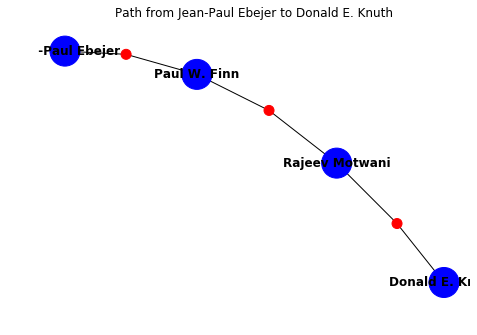

In [103]:
fig = plt.figure()
pos = nx.networkx.spring_layout(G)
nx.draw(G,pos,node_size = node_sizes,node_color = color_map, with_labels = False)
nx.draw_networkx_labels(G,pos,labels,font_weight='bold')
plt.title('Path from Jean-Paul Ebejer to Donald E. Knuth')
fig.savefig('./plots/knuth.png')

### Task E

In [120]:
def get_erdos_number(name):
    Query = ('MATCH (p1:Author {name:\''+name+'\'}),'+
             '(p2:Author {name:\'Paul Erd&#246;s\'}),'+
             ' path = shortestpath((p1)-[:PUBLISHED*]-(p2))'+
             ' RETURN length(path)')
    out = graph.run(Query)
    for i in out:
        return int(i['length(path)']/2)

In [121]:
get_erdos_number('Jean-Paul Ebejer')

4

In [146]:
cs_lecturers = ['Kevin Vella', 'Keith Bugeja', 'Christian Colombo', 
                 'Joshua Ellul', 'Adrian Francalanza','Mark Micallef', 
                 'Gordon J. Pace', 'Sandro Spina', 'Mark Vella', 'Carl J. Debono',
                'Johann A. Briffa', 'Victor Buttigieg', 'Reuben A. Farrugia',
                'Adrian Muscat', 'Trevor Spiteri', 'Gianluca Valentino', 'Saviour Zammit',
                'Conrad Attard', 'Michel Camilleri', 'Clyde Meli', 'Chris Porter', 
                'Joseph G. Vella', 'Lalit Garg', 'Peter Xuereb', 'Colin Layfield', 
                'John Abela','Vitezslav Nezval','Alexiei Dingli', 'Matthew Montebello',
                'Joel Azzopardi','Mike Rosner','Christopher Staff', 'Charlie Abela',
                'George Azzopardi','Claudia Borg','Vanessa Camilleri', 'Dylan Seychell',
                'Edward Gatt','Joseph Micallef','Ivan Grech', 'Owen Casha', 'Nicholas Sammut'
               ]
erdos = []
for lecturer in cs_lecturers:
    erdos.append(get_erdos_number(lecturer))

df = pd.DataFrame({'lecturer':cs_lecturers,'Erdos Number':erdos})
df = df.sort_values(by=['lecturer','Erdos Number'],ascending=True)
df = df.reset_index(drop=True)

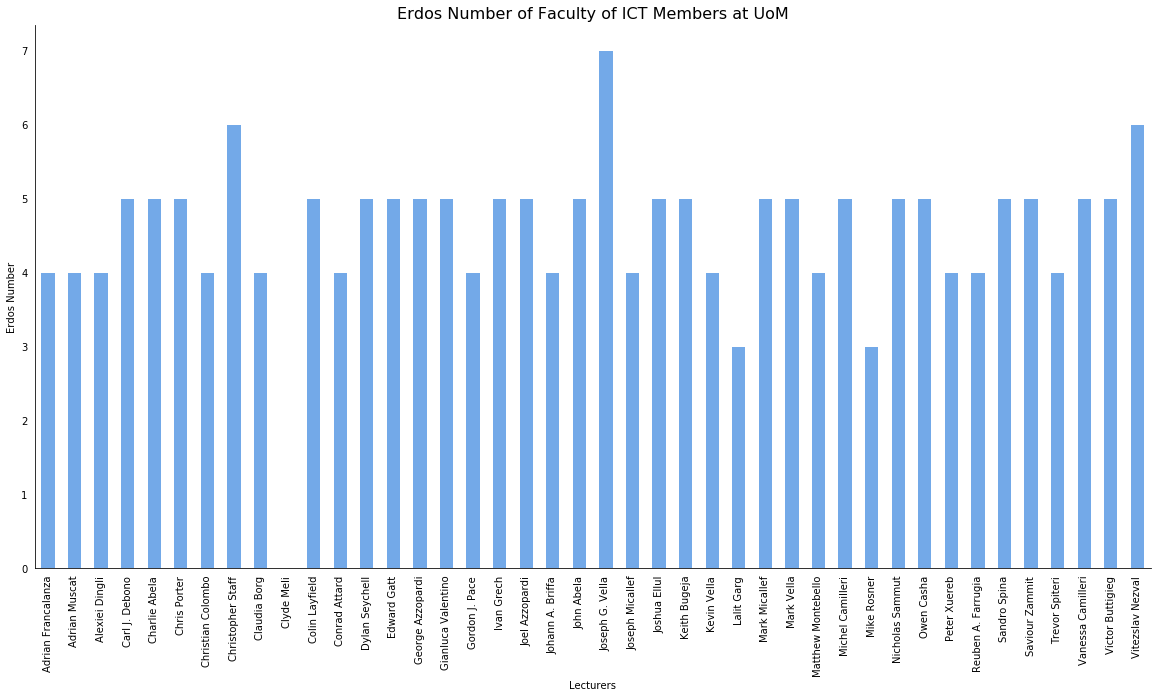

In [147]:
ax = df.plot.bar(x=0,y=1,color='#73A9E8',figsize=(20, 10))

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Switch off ticks
ax.tick_params(axis='both', which='both', bottom=0, top=0, labelbottom=1, left=0, right=0, labelleft=1)

#Remove the legend
ax.get_legend().remove()

ax.set_xlabel('Lecturers')
ax.set_ylabel('Erdos Number')
ax.set_title('Erdos Number of Faculty of ICT Members at UoM',size=16)

ax.get_figure().savefig('./plots/erdos.png',bbox_inches='tight')

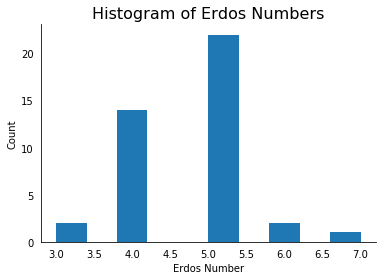

In [150]:
ax = df.plot.hist()
# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Switch off ticks
ax.tick_params(axis='both', which='both', bottom=0, top=0, labelbottom=1, left=0, right=0, labelleft=1)

#Remove the legend
ax.get_legend().remove()

ax.set_xlabel('Erdos Number')
ax.set_ylabel('Count')
ax.set_title('Histogram of Erdos Numbers',size=16)

ax.get_figure().savefig('./plots/erdos_hist.png',bbox_inches='tight')